In [78]:

import matplotlib.pyplot as plt
import os


def get_all_results(results_folder_path):
    """
    Retrieves all the results from the specified folder.

    Args:
        results_folder_path (str): The path to the folder containing the results.

    Returns:
        dict: A dictionary containing the results, where the keys are the file names and the values are dictionaries
              containing the economic and social values.
    """
    values_dict = {}

    for filename in os.listdir(results_folder_path):
        file_path = os.path.join(results_folder_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                content = file.read()
                economic_value = float(content.split("\n")[0].split(": ")[1])
                social_value = float(content.split("\n")[1].split(": ")[1])
                values_dict[filename] = {
                    "economic": economic_value,
                    "social": social_value,
                }

    return values_dict


def extract_economic_scores(dict):
    """
    Extracts the economic scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing economic scores for different keys.

    Returns:
    dict: A new dictionary containing only the economic scores.

    """
    economic_scores = {key: dict[key]['economic'] for key in dict}
    return economic_scores


def extract_social_scores(dict):
    """
    Extracts the social scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing social scores for different keys.

    Returns:
    dict: A new dictionary containing only the social scores.

    """
    social_scores = {key: dict[key]['social'] for key in dict}
    return social_scores

def get_scores_for_model(values_dict, model_dict, model_name):
    economic = extract_economic_scores(values_dict)
    social = extract_social_scores(values_dict)
    economic = {key: economic[key]
                for key in economic.keys() if key in model_dict[model_name]}
    social = {key: social[key]
              for key in social.keys() if key in model_dict[model_name]}
    return economic, social


def get_average_scores(values_dict, corpora_list, model_dict, model_name):
    
    economic, social = get_scores_for_model(values_dict, model_dict, model_name)

    economic_averaged = {}
    for key in economic:
        for corpora in corpora_list:
            if corpora in key:
                if corpora not in economic_averaged:
                    economic_averaged[corpora] = []
                economic_averaged[corpora].append(economic[key])

    social_averaged = {}
    for key in social:
        for corpora in corpora_list:
            if corpora in key:
                if corpora not in social_averaged:
                    social_averaged[corpora] = []
                social_averaged[corpora].append(social[key])

    for key in economic_averaged:
        economic_averaged[key] = sum(
            economic_averaged[key]) / len(economic_averaged[key])

    for key in social_averaged:
        social_averaged[key] = sum(
            social_averaged[key]) / len(social_averaged[key])

    # Extract the model names and scores
    model_names = list(economic_averaged.keys())
    assert (model_names == list(social_averaged.keys()))
    return model_names, economic_averaged, social_averaged

In [79]:

pct_result_path = os.path.join(os.getcwd(), "pct-assets", "results")

values_dict = get_all_results(pct_result_path)

# just grab the keys with ef and ih

keys_with_ef_or_ih = [
    key for key in values_dict.keys() if ('EF' in key or 'IH' in key)]

keys_with_ef_or_ih.append("base_gpt3.5.txt")
keys_with_ef_or_ih.append("base_llama_70b.txt")

# group by corpora

corpora_list = ["auth_left", "auth_right",
                "lib_left", "lib_right", "4chan", "base"]

corpora_dict = {}

for key in keys_with_ef_or_ih:
    for corpora in corpora_list:
        if corpora in key:
            if corpora not in corpora_dict:
                corpora_dict[corpora] = []
            corpora_dict[corpora].append(key)

# group by model

model_list = ["gpt3.5", "llama_70b"]

model_dict = {}

for key in keys_with_ef_or_ih:
    for model in model_list:
        if model in key:
            if model not in model_dict:
                model_dict[model] = []
            model_dict[model].append(key)

Average Scores for LLaMa Model:
	auth_right: (-2.8966666666666665, -5.306666666666666)
	4chan: (-7.05, -6.1)
	base: (-8.88, -7.03)
	lib_left: (-6.8549999999999995, -6.778333333333333)
	lib_right: (-4.1883333333333335, -4.735)
	auth_left: (-5.083333333333333, -6.223333333333334)


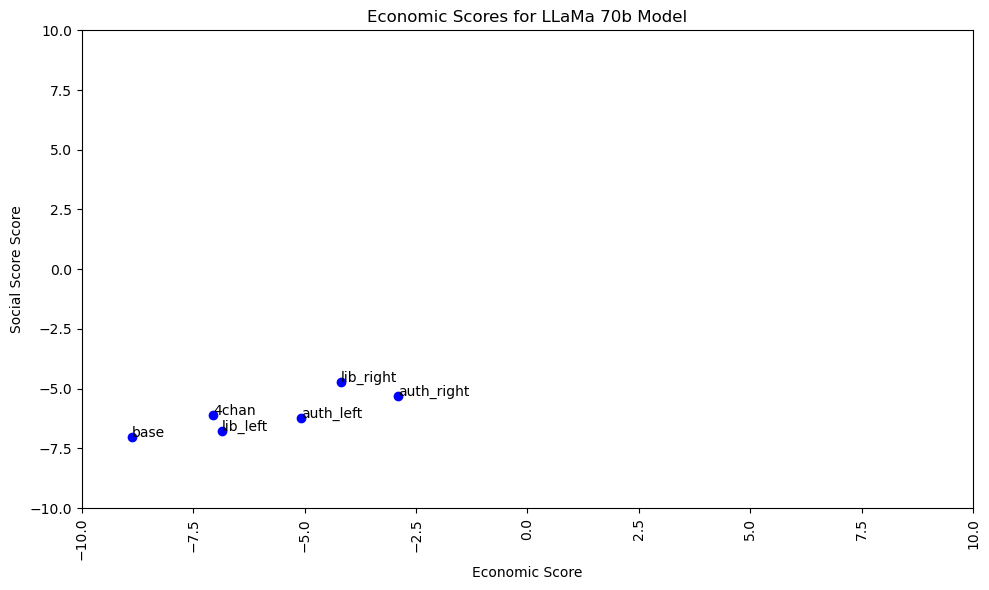

In [80]:
model_names, economic_average_llama_70b, social_average_llama_70b = get_average_scores(
    values_dict, corpora_list, model_dict, "llama_70b")

economic_scores_llama_70b = list(economic_average_llama_70b.values())
social_scores_llama_70b = list(social_average_llama_70b.values())

# Print average scores
print('Average Scores for LLaMa Model:')
for i, model_name in enumerate(model_names):
    print(
        f'\t{model_name}: ({economic_scores_llama_70b[i]}, {social_scores_llama_70b[i]})')


# Plot the scores
plt.figure(figsize=(10, 6))
plt.scatter(economic_scores_llama_70b, social_scores_llama_70b, color='blue')
for i, txt in enumerate(model_names):
    plt.annotate(
        txt, (economic_scores_llama_70b[i], social_scores_llama_70b[i]))
plt.xticks(rotation=90)
plt.xlabel('Economic Score')
plt.ylabel('Social Score Score')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Economic Scores for LLaMa 70b Model')

plt.tight_layout()
plt.show()

Average Scores for LLaMa Model:
	lib_left: (-3.92, -5.136666666666667)
	auth_right: (-3.0016666666666665, -4.2283333333333335)
	auth_left: (-2.6483333333333334, -4.8533333333333335)
	lib_right: (-4.1066666666666665, -4.975)
	base: (-3.63, -3.13)
	4chan: (-4.854, -4.176)


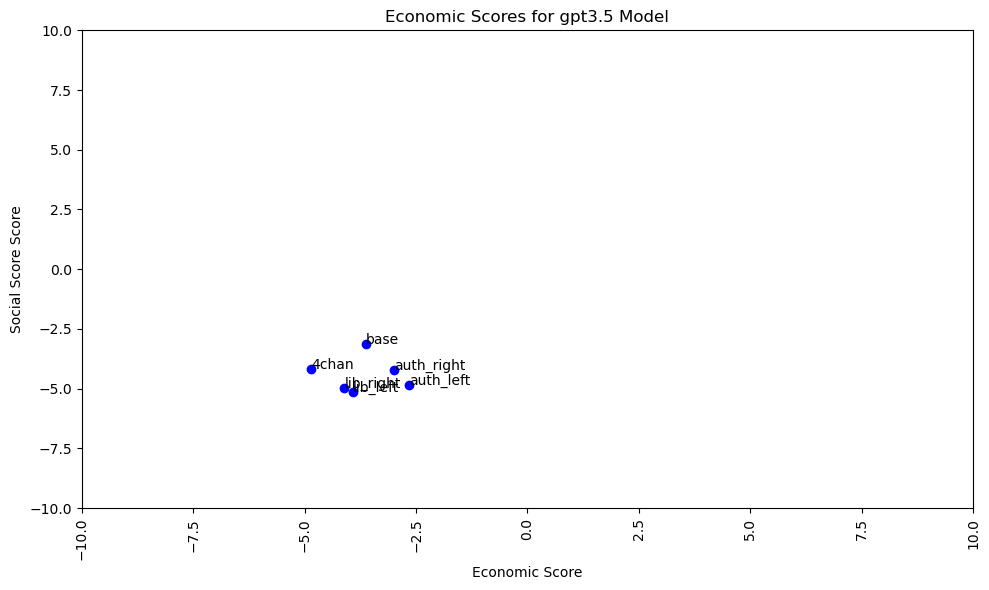

In [81]:
model_names, economic_average_gpt3_5, social_average_gpt3_5 = get_average_scores(
    values_dict, corpora_list, model_dict, "gpt3.5")

economic_scores_gpt3_5 = list(economic_average_gpt3_5.values())
social_scores_gpt3_5 = list(social_average_gpt3_5.values())

# Print average scores
print('Average Scores for LLaMa Model:')
for i, model_name in enumerate(model_names):
    print(
        f'\t{model_name}: ({economic_scores_gpt3_5[i]}, {social_scores_gpt3_5[i]})')

# Plot the scores
plt.figure(figsize=(10, 6))
plt.scatter(economic_scores_gpt3_5, social_scores_gpt3_5, color='blue')
for i, txt in enumerate(model_names):
    plt.annotate(txt, (economic_scores_gpt3_5[i], social_scores_gpt3_5[i]))
plt.xticks(rotation=90)
plt.xlabel('Economic Score')
plt.ylabel('Social Score Score')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Economic Scores for gpt3.5 Model')
plt.tight_layout()
plt.show()

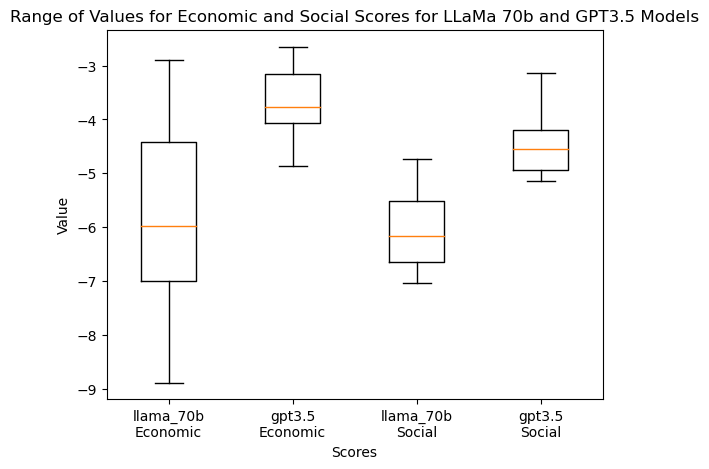

In [74]:
import matplotlib.pyplot as plt

# Extract the values from the economic dictionary

# Create the box and whisker plot
plt.boxplot([economic_scores_llama_70b, economic_scores_gpt3_5, social_scores_llama_70b, social_scores_gpt3_5],
            labels=['llama_70b\nEconomic', 'gpt3.5\nEconomic',  'llama_70b\nSocial', 'gpt3.5\nSocial'])

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Value')
plt.title('Range of Values for Economic and Social Scores for LLaMa 70b and GPT3.5 Models')

# Show the plot
plt.show()

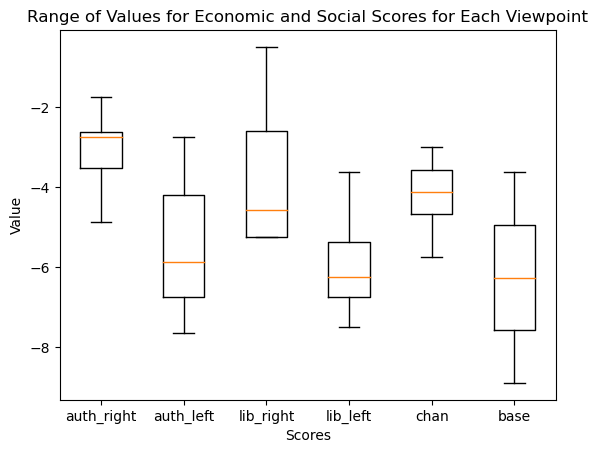

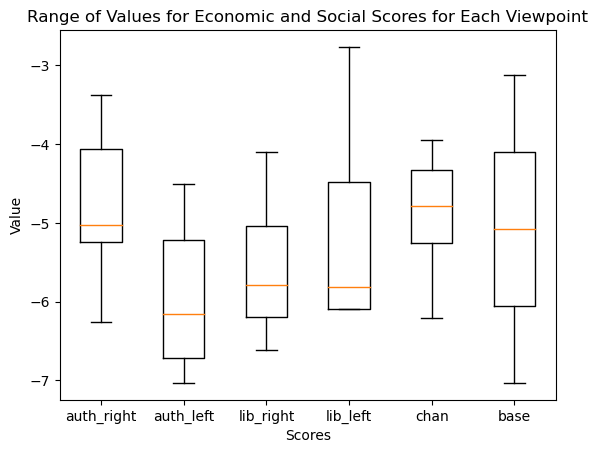

In [89]:
import matplotlib.pyplot as plt
auth_right, auth_left, lib_right, lib_left, chan, base = corpora_dict.values()
auth_right_economic_scores = [values_dict[key]['economic'] for key in auth_right]
auth_left_economic_scores = [values_dict[key]['economic'] for key in auth_left]
lib_right_economic_scores = [values_dict[key]['economic'] for key in lib_right]
lib_left_economic_scores = [values_dict[key]['economic'] for key in lib_left]
chan_economic_scores = [values_dict[key]['economic'] for key in chan]
base_economic_scores = [values_dict[key]['economic'] for key in base]

auth_right_social_scores = [values_dict[key]['social'] for key in auth_right]
auth_left_social_scores = [values_dict[key]['social'] for key in auth_left]
lib_right_social_scores = [values_dict[key]['social'] for key in lib_right]
lib_left_social_scores = [values_dict[key]['social'] for key in lib_left]
chan_social_scores = [values_dict[key]['social'] for key in chan]
base_social_scores = [values_dict[key]['social'] for key in base]


# Extract the values from the economic dictionary

# Create the box and whisker plot
plt.boxplot([auth_right_economic_scores, auth_left_economic_scores, lib_right_economic_scores, lib_left_economic_scores, chan_economic_scores, base_economic_scores],
            labels=['auth_right', 'auth_left', 'lib_right', 'lib_left', 'chan', 'base'])

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Value')
plt.title(
    'Range of Values for Economic and Social Scores for Each Viewpoint')

# Show the plot
plt.show()

# Create the box and whisker plot
plt.boxplot([auth_right_social_scores, auth_left_social_scores, lib_right_social_scores, lib_left_social_scores, chan_social_scores, base_social_scores],
            labels=['auth_right', 'auth_left', 'lib_right', 'lib_left', 'chan', 'base'])

# Add labels and title
plt.xlabel('Scores')
plt.ylabel('Value')
plt.title(
    'Range of Values for Economic and Social Scores for Each Viewpoint')

# Show the plot
plt.show()